In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# importing dataset
dataset = pd.read_csv('C:/Users/vaibh/Desktop/360 Digitmg/Decision Tree/Assignment/Company_Data.csv')

In [3]:
# Checing rows and columns in the dataset
dataset.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
# Checking dmensions of the dataset
dataset.shape

(400, 11)

In [5]:
# Checking for null values
dataset.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

There are no null values

In [6]:
# Checking for duplicate values
dataset.duplicated().sum()

0

There are no duplicated values

In [7]:
# Checking datatypes of the features
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [8]:
# Converting output numerical data to categorical data

dataset.Sales = pd.cut(dataset.Sales, bins= 3 , labels=['Poor','Good','Outstanding'])

In [9]:
# Mean of dataset based on Sales 
dataset.groupby(dataset.Sales).mean()

,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,,,,,,,
Poor,123.676471,64.950980,4.294118,260.186275,127.313725,58.774510,13.950980
Good,125.141700,68.793522,7.121457,267.935223,114.619433,52.218623,13.935223
Outstanding,126.764706,75.411765,8.960784,259.156863,98.450980,47.764706,13.627451


In [10]:
dataset.ShelveLoc.value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [11]:
dataset.Urban.value_counts()

Yes    282
No     118
Name: Urban, dtype: int64

In [12]:
dataset.US.value_counts()

Yes    258
No     142
Name: US, dtype: int64

    Dataset has large number of cloths with medium shelving quality.
    Maximum sales is from urban location.
    Most sales are from US.

<AxesSubplot:xlabel='Sales', ylabel='count'>

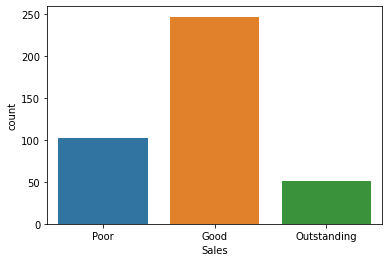

In [13]:
# Countplot of Sales features
sns.countplot(x = dataset.Sales)

Overall Sales of company seems to be good

<AxesSubplot:>

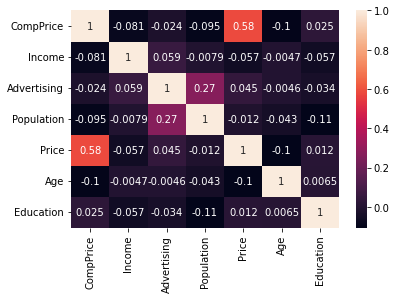

In [14]:
# Correlation between features
sns.heatmap(dataset.corr(),annot=True)

The features are not correlated with each other

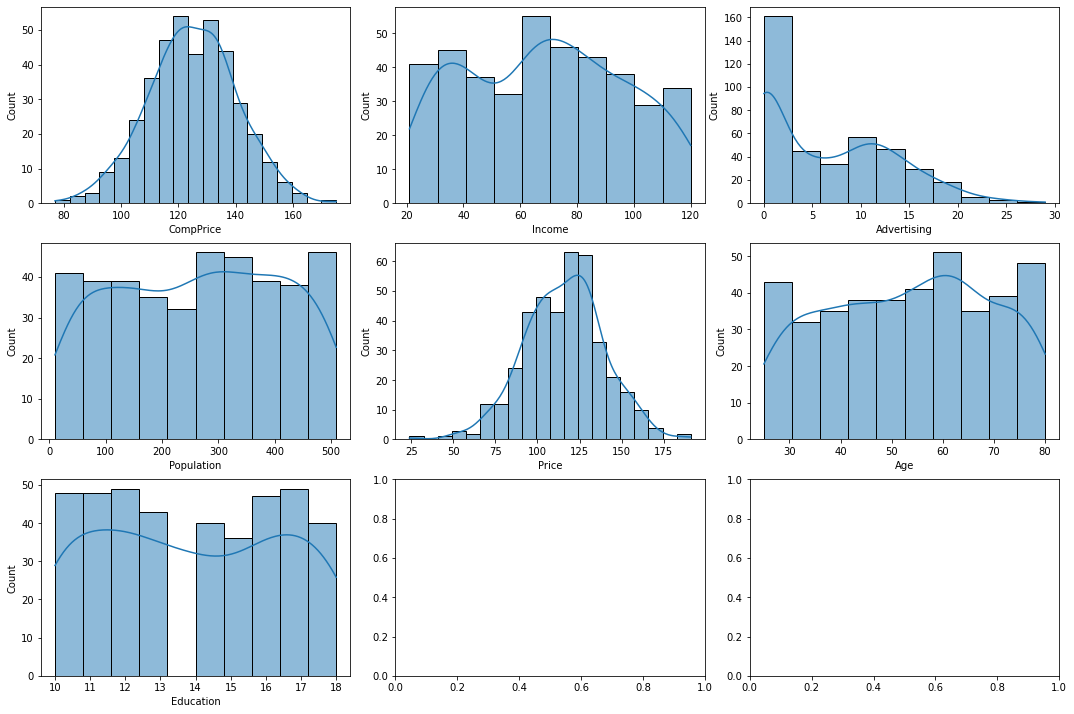

In [15]:
# Histogram for numerical data

figure,axes = plt.subplots(3,3,figsize=(15,10))
index = 0
axes = axes.flatten()
temp = dataset.iloc[:,[1,2,3,4,5,7,8]]

for i in temp.columns:
    sns.histplot(data = dataset[i],kde = 1 ,ax=axes[index])
    index +=1
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=1)

In [16]:
# Converting categorical independent features to numerical
dataset = pd.get_dummies(data=dataset, columns=['ShelveLoc','Urban','US'], drop_first=True)

In [17]:
# Splitting into independent and dependent features
x = dataset.iloc[:,1:]
y = dataset.Sales

In [20]:
# Train-Test split
from sklearn.model_selection import train_test_split
x_train_o, x_test_o, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=0)

In [24]:
# Feature Scaling

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train_o)
x_test = scaler.transform(x_test_o)

In [25]:
# Using Decision Tree

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy')
dt_train = dt.fit(x_train,y_train)  # fitting model to train data

In [26]:
# Predicting results for test data
yhat_test = dt.predict(x_test)

In [27]:
# accuracy for test data
from sklearn.metrics import accuracy_score
test_acc = accuracy_score(y_test,yhat_test)
print(f'Test Data Accuracy: {test_acc*100} %' ) 

Test Data Accuracy: 68.75 %


In [28]:
# Predicting results for train data

yhat_train = dt.predict(x_train)
train_acc = accuracy_score(y_train,yhat_train)
print(f'Train Data Accuracy: {train_acc*100} %')

Train Data Accuracy: 100.0 %


In [29]:
# Confusion matrix for train data

from sklearn.metrics import confusion_matrix
confusion_matrix(y_train,yhat_train)

array([[198,   0,   0],
       [  0,  41,   0],
       [  0,   0,  81]], dtype=int64)

The model has been overfitted. 
Hyper parameter tuning will help with overfitting of the dataset

In [30]:
# Finding best parameters for the model

from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0)

param_grid = {'min_samples_leaf': [1, 5, 10, 20], 'max_depth': [2, 4, 6, 8, 10],'max_features': ['sqrt']}


grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, scoring = 'accuracy', n_jobs = -1, cv = 5, 
                                refit=True, return_train_score=True)

In [31]:
# Fitting GridSearch model 
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 5, 10, 20]},
             return_train_score=True, scoring='accuracy')

In [32]:
# The best parameters for the model are given below
grid_search.best_params_

{'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 20}

In [33]:
# Accuracy of test data using GridSearch
grid_yhat_test = grid_search.best_estimator_.predict(x_test)

grid_test_acc = accuracy_score(y_test,grid_yhat_test)
print(f'Test Data Accuracy using GridSearch: {grid_test_acc*100} %' ) 

Test Data Accuracy using GridSearch: 65.0 %


In [34]:
# Accuracy of train data using GridSearch
grid_yhat_train = grid_search.best_estimator_.predict(x_train)

grid_train_acc = accuracy_score(y_train,grid_yhat_train)
print(f'Train Data Accuracy using GridSearch: {grid_train_acc*100} %' )

Train Data Accuracy using GridSearch: 67.8125 %


In [35]:
# Confusion matrix for test data using GridSearch
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,grid_yhat_test)

array([[40,  0,  9],
       [10,  0,  0],
       [ 9,  0, 12]], dtype=int64)

Using GridSearchCV we found the best parameters for the model where max_depth is 6, max_features is sqrt and min_sample_leaf is 5.
The model accuracy is 65 % 

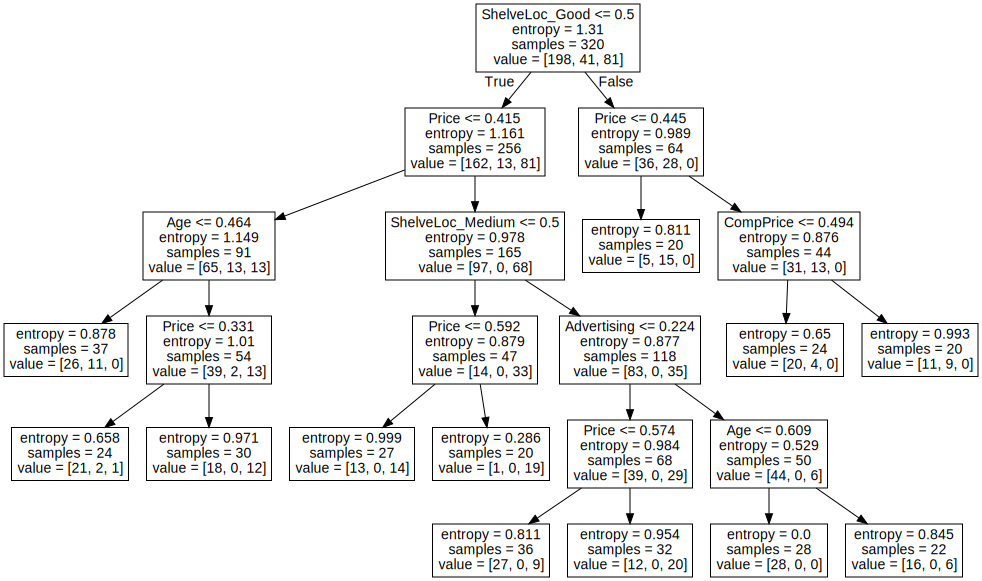

<Figure size 360x144 with 0 Axes>

In [36]:
import graphviz 
import sklearn

plt.figure(figsize=(5,2))
dt = DecisionTreeClassifier(criterion='entropy',max_depth=6, min_samples_leaf=20,random_state=0).fit(x_train, y_train)
dot_data = sklearn.tree.export_graphviz(dt,feature_names = x.columns.tolist())
graph = graphviz.Source(dot_data)
graph 

The above decision tree based on GridSearch parameters

Using Random Forest to see if we can increase the accuracy 

In [54]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(criterion='entropy', random_state=0, min_samples_leaf=5, max_depth=11)
clf.fit(x_train,y_train) # Fitting random forest model to train 
clf_yhat_test = clf.predict(x_test)

In [55]:
# Accuracy of test data using RandomForest

clf_test_acc = accuracy_score(y_test, clf_yhat_test)
print(f'Test Data Accuracy using RandomForest: {clf_test_acc*100} %' ) 

Test Data Accuracy using RandomForest: 78.75 %


In [56]:
# Accuracy of train data using RandomForest

clf_yhat_train = clf.predict(x_train)
clf_train_acc = accuracy_score(y_train, clf_yhat_train)
print(f'Train Data Accuracy using RandomForest: {clf_train_acc*100} %' ) 

Train Data Accuracy using RandomForest: 88.4375 %


Text(33.0, 0.5, 'Actual')

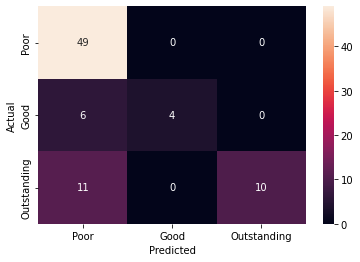

In [57]:
# Confusion matrix for test data using RandomForest

sns.heatmap(confusion_matrix(y_test,clf_yhat_test),annot=True,
            xticklabels=['Poor','Good','Outstanding'], yticklabels=['Poor','Good','Outstanding'])
plt.xlabel('Predicted')
plt.ylabel('Actual')

Using Random Forest we get a test accuracy of 78.75%

In [58]:
# Classification report 

print(sklearn.metrics.classification_report(y_test,clf_yhat_test))

              precision    recall  f1-score   support

        Good       0.74      1.00      0.85        49
 Outstanding       1.00      0.40      0.57        10
        Poor       1.00      0.48      0.65        21

    accuracy                           0.79        80
   macro avg       0.91      0.63      0.69        80
weighted avg       0.84      0.79      0.76        80



RandomForest model can help predict the sales of cloth company with an accuracy of 78% and high precision.